# Project: Wrangle and Analyze WeRateDogs

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs has over 4 million followers and has received international media coverage.


## Table of Contents

<ul>    
<li><a href="#intro">Introduction</a></li>  
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#access">Data Accessing</a></li>
<ul>
    <li><a href="#quality">Quality</a></li>
    <li><a href="#tidy">Tidiness</a></li>
</ul>
<li><a href="#wrangle">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions and Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs has over 4 million followers and has received international media coverage. The main purpose of this project is to gather data from WeRateDogs, access and perform data wrangling on the obtained data from the twitter page using pandas, Numpy, requests, tweepy, Json.

Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis. Performing analysis on a messy dataset could give us results which could tend us to make the wrong decisions about the business. When you have clean and organized data, performing any tasks becomes easier and trustworthy. It is always very important to perform data wrangling for accurate analysis of any given data set.

In this project, we will be working on gathering data through tweety and API when we will access the data and look for its cleanliness and tidiness. After accessing we will clean the data accordingly and perform analysis over the cleaned data and present a visualization of the analysis. 

(Here are some of the full forms for the column names)


In [1]:
#lets import all the packages we need.
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

<a id='gather'></a>
## Data Gathering

Data Gathering is an important step in data analysis. We might not always have all the data needed to perform proper wragling and analysis skills on the dataset so, we will have to gather data from different sources to get complete data. 

Here in this project we will be gathering data through 3 different sources:

1. We have already been given a twitter-archive-enhanced.csv file which gives us WeRateDogs **Twitter archive**.

2. The **tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. We can get each tweet's retweet count and favorite ("like") count at minimum, and any additional data we find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, we will query the **Twitter API** for each tweet's **JSON** data using Python's **Tweepy** library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data will be written to its own line. Then we will read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

> Let's get the twitter archive.

In [2]:
#To read CSV file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
#View 'archive'
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> let's get the image_predictions.tsv programatically by given URL using requests

In [3]:
# using requests.get to pull the data
#reading the data into images
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

#creating a file image_predictions.tsv and writing the contents of images to the file
with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)
    
#reading the file as a dataframe
images = pd.read_csv('image_predictions.tsv', sep = '\t')
#view the data
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> Let's get the data using API

In [4]:
#lets load the keys
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

In [5]:
# it's time to authenticate the keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Construct the API instance
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
tweet_ids = twitter_archive['tweet_id']
# empty array for storing the tweets data which we succesfully get from the API
working_tweets =[]
# empty array for storing the tweets data which we can not get from the API
non_working_tweets = []
# opening the file to write json records
with open('tweet_json.txt', 'w') as file:
    start_time = datetime.now() 
    for tweet_id in tweet_ids:
        try:
            # Returns a single status specified by the tweet_id.
            tweets = api.get_status(tweet_id, tweet_mode='extended')
            #write the data to file
            json.dump(tweets._json, file)
            file.write('\n')
            #appending all the data to respected file
            working_tweets.append(tweet_id)
        except Exception as e:
            print(tweet_id, e)
            non_working_tweets.append(tweet_id)
    time_elapsed = datetime.now() - start_time
    # To check run time of the code
    print('Time elapsed {}'.format(time_elapsed))



888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 [{'code': 144, 'message': 'No status found with that ID.'}]
771004394259247104 [{'code': 179, 'message': 'Sorry,

In [7]:
#reading the json file as a dataframe
tweets_json = pd.read_json('tweet_json.txt',lines  = True, encoding='utf-8')
#View data
tweets_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38299,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8409,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32831,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6199,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24732,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4100,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41642,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8529,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39815,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9255,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


<a id='access'></a>
## Data Accessing

In this section of the project, we will assess all three data and try to find out the cleanliness and tidiness issues our data has.

> First let's check the issues visually by viewing the datasets.

In [8]:
#lets view twitter_archive 
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#lets check a randomly selected sample
twitter_archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2216,668537837512433665,NaN,NaN,2015-11-22 21:13:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spark. He's nervous. Other dog hasn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668537837...,8,10,Spark,None,None,None,None
2043,671536543010570240,NaN,NaN,2015-12-01 03:49:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reginald. He's pondering what life wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671536543...,9,10,Reginald,None,None,None,None
139,865359393868664832,NaN,NaN,2017-05-19 00:12:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sammy. Her tongue ejects without warni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865359393...,13,10,Sammy,None,None,None,None
1517,690938899477221376,NaN,NaN,2016-01-23 16:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","She thought the sunset was pretty, but I thoug...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690938899...,10,10,None,None,None,None,None
1809,676864501615042560,NaN,NaN,2015-12-15 20:40:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's just a head now. Lost his body ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676864501...,10,10,Ash,None,None,None,None
2187,668979806671884288,NaN,NaN,2015-11-24 02:29:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chaz. He's an X Games half pipe supers...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668979806...,12,10,Chaz,None,None,None,None
1297,707776935007539200,NaN,NaN,2016-03-10 03:55:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707776935...,11,10,Sadie,None,None,None,None
1192,717790033953034240,NaN,NaN,2016-04-06 19:04:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a badass mystery pupper. You weren't aw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717790033...,10,10,None,None,None,pupper,None
1125,730196704625098752,NaN,NaN,2016-05-11 00:43:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's camera shy. Tail longer ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730196704...,6,10,Charles,None,None,None,None
1891,674764817387900928,NaN,NaN,2015-12-10 01:37:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two pups are masters of camouflage. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674764817...,10,10,None,None,None,None,None


In [10]:
#view the images dataset
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
#lets check a randomly selected sample
images.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1972,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
1682,813910438903693312,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,1,Siberian_husky,0.699355,True,Eskimo_dog,0.256433,True,Norwegian_elkhound,0.013189,True
1890,848690551926992896,https://pbs.twimg.com/media/C8cnjHuXsAAoZQf.jpg,1,flat-coated_retriever,0.823648,True,Newfoundland,0.100571,True,groenendael,0.038310,True
1227,745314880350101504,https://pbs.twimg.com/media/Clfj6RYWMAAFAOW.jpg,2,ice_bear,0.807762,False,great_white_shark,0.027040,False,fountain,0.022052,False
652,682032003584274432,https://pbs.twimg.com/media/CXcQfUNUQAEwFoQ.jpg,1,schipperke,0.997953,True,groenendael,0.000676,True,miniature_pinscher,0.000211,True
666,682788441537560576,https://pbs.twimg.com/media/CXnAdosWAAEMGCM.jpg,1,toyshop,0.375610,False,orange,0.094538,False,teddy,0.039808,False
1638,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
905,700151421916807169,https://pbs.twimg.com/media/CbdwATgWwAABGID.jpg,1,tennis_ball,0.328236,False,Italian_greyhound,0.176838,True,Staffordshire_bullterrier,0.134080,True


In [12]:
#view the dataset
tweets_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38299,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8409,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32831,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6199,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24732,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4100,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41642,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8529,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39815,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9255,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19989,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,3074,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11703,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,2042,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",64660,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,18644,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",27477,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,4215,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",31528,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,7299,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [13]:
#lets check a randomly selected sample
tweets_json.sample(25)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1590,NaN,NaN,2016-01-09 04:34:45,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2148,False,Jack deserves another round of applause. If yo...,NaN,...,NaN,NaN,NaN,NaN,137,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
266,NaN,NaN,2017-03-11 22:59:09,"[12, 56]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,188,False,@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,...,NaN,NaN,NaN,NaN,2,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2280,NaN,NaN,2015-11-18 23:18:48,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667119782572007424, 'id_str'...",332,False,This is Gabe. He is a southern Baklava. Gabe h...,NaN,...,NaN,NaN,NaN,NaN,128,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
981,NaN,NaN,2016-06-30 02:10:24,"[0, 67]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",NaN,8158,False,SWIM AWAY PUPPER SWIM AWAY 13/10 #BarkWeek ht...,NaN,...,NaN,NaN,NaN,NaN,4474,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1170,NaN,NaN,2016-04-09 01:35:37,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 718613299022180352, 'id_str'...",2563,False,This is Carper. He's a Tortellini Angiosperm. ...,NaN,...,NaN,NaN,NaN,NaN,517,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
583,NaN,NaN,2016-11-16 01:54:03,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Baloo. He's expecting a fa...,NaN,...,NaN,NaN,NaN,NaN,7333,False,{'created_at': 'Wed Jun 08 22:48:46 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
598,NaN,NaN,2016-11-12 21:02:38,"[0, 109]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 797545138759139328, 'id_str'...",15651,False,This is Cassie. She steals things. Guilt incre...,NaN,...,NaN,NaN,NaN,NaN,5386,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2242,NaN,NaN,2015-11-20 15:36:22,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667728195987177472, 'id_str'...",382,False,Meet Olive. He comes to spot by tree to remini...,NaN,...,NaN,NaN,NaN,NaN,152,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
891,NaN,NaN,2016-07-27 00:40:12,"[0, 87]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,20481,False,In case you haven't seen the most dramatic sne...,NaN,...,NaN,NaN,NaN,NaN,10979,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1585,NaN,NaN,2016-01-10 02:13:27,"[0, 87]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 686007910048989185, 'id_str'...",2619,False,This pupper has a magical eye. 11/10 I can't s...,NaN,...,NaN,NaN,NaN,NaN,452,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


> Now lets check for issues with data programatically

In [14]:
#checking the datatypes and number of records
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
#check for duplicate values
sum(twitter_archive.duplicated())

0

In [16]:
# check duplicate values based on tweet_id if any
twitter_archive[twitter_archive['tweet_id'].duplicated(keep = False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
#check for null values
sum(twitter_archive.name.isnull())

0

In [18]:
# check stats
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
#check names
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
an            7
Bailey        7
Toby          7
Buddy         7
Daisy         7
Rusty         6
Bella         6
Leo           6
Jack          6
Milo          6
Koda          6
Dave          6
Scout         6
Jax           6
Stanley       6
Oscar         6
Louis         5
           ... 
Tedders       1
Cora          1
Godi          1
Oreo          1
Pupcasso      1
Rufio         1
Jersey        1
Vinscent      1
Nico          1
Augie         1
Bayley        1
Rooney        1
Bilbo         1
Mona          1
Gustav        1
Gustaf        1
Clybe         1
Willy         1
Birf          1
Mo            1
Chadrick      1
Grady         1
Hector        1
Ruffles       1
Blakely       1
Chesney       1
by            1
Torque        1
Jennifur      1
Creg          1
Name: name, Length: 957,

In [20]:
#check how many unique name we have in dataset
twitter_archive.name.nunique()

957

In [21]:
#lets check the ratings
twitter_archive.rating_numerator.sort_values(ascending = False)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
1663      20
55        17
285       15
291       15
83        14
866       14
        ... 
2183       3
1314       3
1928       3
765        3
2202       3
1692       3
1478       3
1898       3
1249       3
2305       3
2079       2
2326       2
2349       2
2237       2
2246       2
1920       2
1761       2
2310       2
1764       2
1940       1
2038       1
2091       1
1869       1
1446       1
605        1
2338       1
2261       1
2335       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [22]:
#lets view some of the text records by random for numerators to see how accurate the rating_numerator values are
print(twitter_archive.text[695], '\nrating_numerator:', twitter_archive.rating_numerator[695])
print(twitter_archive.text[1994], '\nrating_numerator:', twitter_archive.rating_numerator[1994])
print(twitter_archive.text[1202], '\nrating_numerator:', twitter_archive.rating_numerator[1202])
print(twitter_archive.text[1762], '\nrating_numerator:', twitter_archive.rating_numerator[1762])
print(twitter_archive.text[55], '\nrating_numerator:', twitter_archive.rating_numerator[55])
print(twitter_archive.text[45], '\nrating_numerator:', twitter_archive.rating_numerator[45])


This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
rating_numerator: 75
This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe 
rating_numerator: 11
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 
rating_numerator: 50
Meet Grizz. He just arrived. Couldn't wait until Christmas. Worried bc he saw the swastikas on the carpet. 10/10 https://t.co/QBGwYrT7rv 
rating_numerator: 10
@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s 
rating_numerator: 17
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 
rating_numerator: 5


In [23]:
#lets check the denominator ratings
twitter_archive.rating_denominator.sort_values(ascending = False)

1120    170
902     150
1634    130
1779    120
1635    110
1228     90
1254     80
1843     80
433      70
1274     50
1351     50
1202     50
1433     40
1598     20
1165     20
1663     16
342      15
1662     11
1068     11
784      11
800      10
778      10
777      10
776      10
779      10
780      10
799      10
775      10
781      10
782      10
       ... 
1556     10
1555     10
1554     10
1553     10
1552     10
1551     10
1550     10
1549     10
1548     10
1547     10
1562     10
0        10
1571     10
1577     10
1564     10
1565     10
1566     10
1567     10
1568     10
1569     10
1570     10
1563     10
1572     10
1573     10
1574     10
1575     10
1576     10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

In [24]:
#lets view some of the text records by random for denominator to see how accurate the rating_denominator values are
print(twitter_archive.text[1120], '\nrating_denominator:', twitter_archive.rating_denominator[1120])
print(twitter_archive.text[902], '\nrating_denominator:', twitter_archive.rating_denominator[902])
print(twitter_archive.text[1634], '\nrating_denominator:', twitter_archive.rating_denominator[1634])
print(twitter_archive.text[516], '\nrating_denominator:', twitter_archive.rating_denominator[516])
print(twitter_archive.text[2335], '\nrating_denominator:', twitter_archive.rating_denominator[2335])
print(twitter_archive.text[313], '\nrating_denominator:', twitter_archive.rating_denominator[313])



Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv 
rating_denominator: 170
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE 
rating_denominator: 150
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3 
rating_denominator: 130
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx 
rating_denominator: 7
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv 
rating_denominator: 2
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 
rating_denominator: 0


In [25]:
#check a perticulat single record
twitter_archive[twitter_archive.rating_denominator == 170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [26]:
#checking the datatypes and number of records
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
#check duplicate values based on image url if any
sum(images.jpg_url.duplicated())

66

In [28]:
## check duplicate values based on tweet_id if any
images[images['tweet_id'].duplicated(keep = False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [29]:
# view the duplicated records basedon image url
images[images['jpg_url'].duplicated(keep = False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


In [30]:
#checking the datatypes and number of records
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2341 non-null datetime64[ns]
display_text_range               2341 non-null object
entities                         2341 non-null object
extended_entities                2067 non-null object
favorite_count                   2341 non-null int64
favorited                        2341 non-null bool
full_text                        2341 non-null object
geo                              0 non-null float64
id                               2341 non-null int64
id_str                           2341 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [31]:
#check what is id and id_str in tweets_json
tweets_json['id'].equals(tweets_json['id_str'])

False

In [32]:
tweets_json[['id','id_str']]

,id,id_str
0,892420643555336193,892420643555336192
1,892177421306343426,892177421306343424
2,891815181378084864,891815181378084864
3,891689557279858688,891689557279858688
4,891327558926688256,891327558926688256
5,891087950875897856,891087950875897856
6,890971913173991426,890971913173991424
7,890729181411237888,890729181411237888
8,890609185150312448,890609185150312448
9,890240255349198849,890240255349198848


In [33]:
#check what is lang in tweets_json
tweets_json['lang'].sort_values(ascending = False)

1899    und
282     und
399     und
1065    und
1508    und
31      und
609     und
2174     tl
2245     ro
1871     nl
1644     nl
2263     nl
1651     in
856      in
159      in
967      eu
2269     et
1330     es
859      en
866      en
776      en
775      en
774      en
772      en
773      en
777      en
771      en
770      en
867      en
769      en
       ... 
1544     en
1543     en
1542     en
1540     en
1549     en
1539     en
1538     en
1537     en
1536     en
1535     en
1534     en
1548     en
1550     en
1566     en
1559     en
1565     en
1564     en
1563     en
1562     en
1561     en
1560     en
1558     en
1551     en
1557     en
1556     en
1555     en
1554     en
1553     en
1552     en
0        en
Name: lang, Length: 2341, dtype: object

In [34]:
#unique values of lang in tweets_json
tweets_json.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

<a id='quality'></a>
### Quality

The four main data quality dimensions are:

- Completeness: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
- Validity: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
- Accuracy: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too less because the scale was faulty.
- Consistency: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

`twitter_archive table`
- Missing values in different columns
- Need only original tweets
- unwanted columns
- Many numerator values are greater than 10 and inaccruate values
- Denomenitor values are not always 10(sometimes greater, sometimes lesser) and inaccurate values
- Missing values in name mentioned as 'None', 'this', 'the', 'a', 'an'
- Erroneous datatypes(tweet_id, timestamp, retweeted_status_id)

`images table`
- Need breed from the prediction columns
- Unwanted columns
- Missing records when compared to twitter_archive table

`tweets_json table`
- Missing records when compared to twitter_archive table
- Unwanted columns
- Wrong column name (id should be tweet_id)
- Erroneous datatypes(lang)

<a id='tidy'></a>
### Tidiness

Tidiness refers to the structural issue of the data. Three main rules for tidy data are:
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table



`twitter_archive table`
- Dog stage is mentioned in 4 differrent columns

`images table`
- Duplicated records with different id's

`Common tidiness issues`
- timestamp should be divided into 3 columns as day, month, year
- all the data should be in one table


<a id='wrangle'></a>
## Data Wrangling

This part of the project involves in cleaning quality and tidiness issues we earlier discovered in data accessing issues.

In [35]:
# lets create a copy of the original data to perform cleaning on copied dataframes
twitter_archive_clean = twitter_archive.copy()
images_clean = images.copy()
tweets_json_clean = tweets_json.copy()

### Cleaning Quality Issues


**Need only original tweets - twitter_archive**

Define: 

We are asked to work only on the original tweets. we will use isnull fuction to get clean original reacords leaving the retweets.


**Code**

In [36]:
# filter the null values using isnull and restore then in twitter_archive_clean
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]


**Test**

In [37]:
# Lets check all the unique values in the retweeted_status_id to see if we have any retweeted record
twitter_archive_clean.retweeted_status_id.unique()

array([nan])

**Drop unwanted columns - twitter_archive**


Define:

We have many unwanted columns in twitter_archive_clean table. Lets drop the unwanted columns using pandas drop fucntions.

We will drop in_reply_to_status_id, in_reply_to_user_id, source, expanded_urls.

We can also drop retweets because we have only orginal tweets now. so lets drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. 

**Code**

In [38]:
# Lets drop the unwanted columns using drop in pandas
twitter_archive_clean.drop([ 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'expanded_urls', 'retweeted_status_id',
                            'retweeted_status_user_id', 'retweeted_status_timestamp', ], axis = 1, inplace = True)

**Test**

In [39]:
# Lets check the columns in twitter_archive_clean
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


**Missing values in different columns - twitter_archive**

**Missing values in name column mentioned as 'None', 'this', 'the', 'a', 'an' - twitter_archive**

Define: 
    
We have many missing values in twitter_archive_clean. lets do a quick dropna using pandas to drop the null values also we need to get rid of the 'None','this', 'the', 'a', 'an' records in name column


**Code**

In [40]:
#we will use dropna
twitter_archive_clean.dropna(inplace = True)
# now lets drop the  'None', 'this', 'the', 'a', 'an' values in name
twitter_archive_clean = twitter_archive_clean.loc[~twitter_archive_clean['name'].isin(['None','a','this','the','an'])]


**Test**

In [41]:
# lets check the null values and number of records
twitter_archive_clean.isnull().sum()
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 2326
Data columns (total 10 columns):
tweet_id              1425 non-null int64
timestamp             1425 non-null object
text                  1425 non-null object
rating_numerator      1425 non-null int64
rating_denominator    1425 non-null int64
name                  1425 non-null object
doggo                 1425 non-null object
floofer               1425 non-null object
pupper                1425 non-null object
puppo                 1425 non-null object
dtypes: int64(3), object(7)
memory usage: 122.5+ KB


In [42]:
#to check if we got rid of wrong missing values in the name column
twitter_archive_clean[twitter_archive_clean['name'] == 'None']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Erroneous datatypes (tweet_id, timestamp) - twitter_archive**


Define: 

The given data has tweet_id datatype as int which is true as its number but as it represents ID and we cant perform calculations on it the datatype should be an object and timestamp datatype is given as object where it should be datetime. We will use astype from pandas to change the datatype 


**Code**

In [43]:
#Lets change the datatype of tweet_id first
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(object)


In [44]:
#Lets change the timestamp datatype to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

**Test**

In [45]:
#check the datatypes
twitter_archive_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
text                          object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

**Numerator and Denominator values are inaccurate - twitter_archive**

Define: 

According to the given data set the numerator and denominator values are inaccurate when compared to the ratings given in text column and also some of the ratings are fractional so we would need float datatype for numerator and denominator values. First we will see all the text in text column then we will extract only rating from the text using extract in pnadas with the help of regex. Then we will use loop to store data in respective variables. Later we will create new columns for programatically obtained ratings and drop the previous ratings column.

**Code**

In [46]:
#write a loop to print all the rows in the text column
for row in twitter_archive_clean.text:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b
Th

In [47]:
#lets extract all the ratings into rating using regex in pandas
rating = twitter_archive_clean.text.str.findall('(\d+(\.\d+)|(\d+))\/(\d+)')
#view rating
rating

0       [(13, , 13, 10)]
1       [(13, , 13, 10)]
2       [(12, , 12, 10)]
3       [(13, , 13, 10)]
4       [(12, , 12, 10)]
6       [(13, , 13, 10)]
8       [(13, , 13, 10)]
9       [(14, , 14, 10)]
10      [(13, , 13, 10)]
11      [(13, , 13, 10)]
13      [(12, , 12, 10)]
14      [(13, , 13, 10)]
15      [(13, , 13, 10)]
16      [(12, , 12, 10)]
17      [(13, , 13, 10)]
18      [(13, , 13, 10)]
20      [(12, , 12, 10)]
21      [(13, , 13, 10)]
22      [(14, , 14, 10)]
23      [(13, , 13, 10)]
26      [(13, , 13, 10)]
27      [(13, , 13, 10)]
28      [(13, , 13, 10)]
29      [(12, , 12, 10)]
31      [(13, , 13, 10)]
33      [(12, , 12, 10)]
34      [(13, , 13, 10)]
38      [(12, , 12, 10)]
39      [(13, , 13, 10)]
40      [(13, , 13, 10)]
              ...       
2270    [(11, , 11, 10)]
2271      [(9, , 9, 10)]
2274      [(7, , 7, 10)]
2275    [(11, , 11, 10)]
2279      [(7, , 7, 10)]
2280      [(8, , 8, 10)]
2282      [(9, , 9, 10)]
2283    [(11, , 11, 10)]
2286    [(10, , 10, 10)]


In [48]:
#Now we have to get rating of numerator and denominator seperately into different columns
#Lets assign empty arrays to numerator and denominator first

numerator = []
denominator = []

# lets write a loop to iterate through rating
for rate in rating:
    #for one rating
    if len(rate) == 1:
        numerator.append(float(rate[0][0])) #we will use float as we might have factions in ratings
        denominator.append(float(rate[0][-1]))
    elif len(rate) > 1: #we have more than 1 ratings some times so lets take an average of both
        #declaring a beginning value
        rate_sum = 0
        rate_avg = 0
        #loop to calculate sum of ratings
        for i in range(len(rate)):
            rate_sum += float(rate[i][0])
        rate_avg = (rate_sum/len(rate))
        numerator.append(rate_avg)
        denominator.append(float(rate[0][-1]))

In [49]:
# lets store the numerator and denominator values into the dataframe
twitter_archive_clean['numerator_rating'] = numerator
twitter_archive_clean['denominator_rating'] = denominator
#view the data
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,numerator_rating,denominator_rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,13.0,10.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,13.0,10.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,12.0,10.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,13.0,10.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,12.0,10.0


In [50]:
# we don't need the previous rating columns so lets drop them
twitter_archive_clean.drop(['rating_numerator','rating_denominator'], axis = 1, inplace = True)

**Test**

In [51]:
# Lets view the data and see the counts
#twitter_archive_clean.head() 
twitter_archive_clean.numerator_rating.value_counts()

12.00      350
11.00      316
10.00      278
13.00      187
9.00       103
8.00        71
7.00        34
14.00       20
6.00        18
5.00        13
3.00        10
4.00         5
2.00         4
9.50         3
8.50         2
10.50        2
11.27        1
30.50        1
5.50         1
9.75         1
24.00        1
7.50         1
13.50        1
4.50         1
1776.00      1
Name: numerator_rating, dtype: int64

**Get Breed from p columns(predictions) - images**

Define:

We have different columns in the images table which tells us the chances of breed the dog could be. So lets get the best suited breed of dog from the given values. We would be running for loop to get the breed and we will store in a new column.

**Code**

In [52]:
#lets check a sample first to get familiarity
images_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
522,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,seat_belt,0.790028,False,Boston_bull,0.196307,True,French_bulldog,0.012429,True
1779,828409743546925057,https://pbs.twimg.com/media/C38aQYgXAAMY2Wh.jpg,1,teddy,0.908457,False,toy_poodle,0.018040,True,standard_poodle,0.012667,True
1426,772581559778025472,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,3,Newfoundland,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,0.059476,True
1783,829011960981237760,https://pbs.twimg.com/media/C4E99ygWcAAQpPs.jpg,2,boxer,0.312221,True,dalmatian,0.244040,True,conch,0.130273,False
1190,739844404073074688,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,1,toy_poodle,0.342397,True,table_lamp,0.104451,False,miniature_poodle,0.079871,True
430,674269164442398721,https://pbs.twimg.com/media/CVt8OmIWIAAbxvJ.jpg,1,pug,0.622921,True,Norwegian_elkhound,0.048659,True,Cardigan,0.016966,True
1834,836989968035819520,https://pbs.twimg.com/media/C52V7PzWcAA_pVv.jpg,1,shopping_cart,0.572422,False,shopping_basket,0.414002,False,toy_poodle,0.005887,True
1707,817777686764523521,https://pbs.twimg.com/ext_tw_video_thumb/81777...,1,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True
847,695409464418041856,https://pbs.twimg.com/media/CaaXN5LUYAEzAh-.jpg,1,pug,0.997445,True,bull_mastiff,0.001749,True,Pekinese,0.000304,True
1697,816697700272001025,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg,1,Chihuahua,0.756992,True,Pomeranian,0.052850,True,Maltese_dog,0.047608,True


In [53]:
# create empty array for breed
breed = []
#we don't have to calculate the p1_conf because the given data always has p1>p2>p3 
 # so we will not use that in if condition
for i in range(len(images_clean)):
    if images_clean.p1_dog[i] == True: 
        breed.append(images_clean.p1[i])
       
    elif images_clean.p2_dog[i] == True: 
        breed.append(images_clean.p2[i])
        
    elif images_clean.p3_dog[i] == True:  
        breed.append(images_clean.p3[i])
        
    else:
        breed.append('NaN')

#assigning column 
images_clean['breed'] = breed

#view data
images_clean.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


**Test**

In [54]:
#check the breed column
images_clean.breed

0            Welsh_springer_spaniel
1                           redbone
2                   German_shepherd
3               Rhodesian_ridgeback
4                miniature_pinscher
5              Bernese_mountain_dog
6                               NaN
7                              chow
8                  golden_retriever
9                  miniature_poodle
10                 golden_retriever
11                    Gordon_setter
12                     Walker_hound
13                              pug
14                       bloodhound
15                            Lhasa
16                   English_setter
17                              NaN
18                              NaN
19                Italian_greyhound
20                      Maltese_dog
21                              NaN
22                     Newfoundland
23                 golden_retriever
24                         malamute
25                              NaN
26      soft-coated_wheaten_terrier
27                        Ch

**Unwanted columns - images**

Define:

As we already have the breed for dogs lets drop the unwanted prediction columns. 

**Code**

In [55]:
#we already have the breed from prediction values so lets drop prediction columns
images_clean.drop(['img_num','p1','p1_conf','p1_dog', 'p2','p2_conf','p2_dog', 
             'p3','p3_conf','p3_dog'], axis = 1, inplace = True)


**Test**

In [56]:
#check the data
images_clean.head()

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


**Match records when compared to twitter_archive_table - images**

Define:

We need to get twitter_archive data and images data into single dataset and get rid of null values and values which are not present on twitter_archive. We will use merge to that but before we try merge we also need to change the tweet_id of images to object datatype

**Code**

In [57]:
#first change the tweet_id datatype to object so it can match with twitter_archive_clean data
images_clean.tweet_id = images_clean.tweet_id.astype(object)
#merge the two datasets 
twitter_archive_images = twitter_archive_clean.merge(images_clean, on = ['tweet_id', 'tweet_id'], how = 'left')


**Test**

In [58]:
#view data
twitter_archive_images.info()
twitter_archive_images.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1424
Data columns (total 12 columns):
tweet_id              1425 non-null object
timestamp             1425 non-null datetime64[ns]
text                  1425 non-null object
name                  1425 non-null object
doggo                 1425 non-null object
floofer               1425 non-null object
pupper                1425 non-null object
puppo                 1425 non-null object
numerator_rating      1425 non-null float64
denominator_rating    1425 non-null float64
jpg_url               1379 non-null object
breed                 1379 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 144.7+ KB


,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,numerator_rating,denominator_rating,jpg_url,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,13.0,10.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,13.0,10.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,12.0,10.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,13.0,10.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,12.0,10.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset


**Correcting id column to tweet_id and changing the datatype - tweets_json**

Define:

We have id column which should be tweet_id, the tweet_id should be object datatype.

**Code**

In [59]:
#tweets_json.info()
#need to change the id datatype to object
tweets_json_clean.id = tweets_json_clean.id.astype(object)

In [60]:
#tweets_json_clean.dtypes
#rename it to tweet_id
tweets_json_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [61]:
#merge the datasets
twitter_master = twitter_archive_images.merge(tweets_json_clean, on =['tweet_id', 'tweet_id'], how = 'left' )

**Test**

In [62]:
#view the dataset
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1424
Data columns (total 43 columns):
tweet_id                         1425 non-null object
timestamp                        1425 non-null datetime64[ns]
text                             1425 non-null object
name                             1425 non-null object
doggo                            1425 non-null object
floofer                          1425 non-null object
pupper                           1425 non-null object
puppo                            1425 non-null object
numerator_rating                 1425 non-null float64
denominator_rating               1425 non-null float64
jpg_url                          1379 non-null object
breed                            1379 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1424 non-null datetime64[ns]
display_text_range               1424 non-null object
entities       

**Erroneous Datatype(lang) - twitter_master**

Define: 

The lang column datatype should be categorical. we will use astype to change the datatype.

**Code**

In [63]:
#change the datatype to category
twitter_master.lang = twitter_master.lang.astype('category')

**Test**

In [64]:
#check the datatype
twitter_master.lang.dtypes

CategoricalDtype(categories=['en'], ordered=False)

**Drop unwanted columns**

Define: 

There are many unwanted columns in the twitter_master so we will drop the columns which we will not be using.

**Code**

In [65]:
#view all the columns and datatypes and number of records to see what columns we need further
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1424
Data columns (total 43 columns):
tweet_id                         1425 non-null object
timestamp                        1425 non-null datetime64[ns]
text                             1425 non-null object
name                             1425 non-null object
doggo                            1425 non-null object
floofer                          1425 non-null object
pupper                           1425 non-null object
puppo                            1425 non-null object
numerator_rating                 1425 non-null float64
denominator_rating               1425 non-null float64
jpg_url                          1379 non-null object
breed                            1379 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1424 non-null datetime64[ns]
display_text_range               1424 non-null object
entities       

In [66]:
#select all the columns we need
twitter_master = twitter_master[['tweet_id','timestamp','text','name','doggo','floofer','pupper','puppo',
                                'numerator_rating','denominator_rating','lang','jpg_url','breed',
                                 'favorite_count','retweet_count']]

**Test**

In [67]:
#check the data
twitter_master.info()
twitter_master.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1424
Data columns (total 15 columns):
tweet_id              1425 non-null object
timestamp             1425 non-null datetime64[ns]
text                  1425 non-null object
name                  1425 non-null object
doggo                 1425 non-null object
floofer               1425 non-null object
pupper                1425 non-null object
puppo                 1425 non-null object
numerator_rating      1425 non-null float64
denominator_rating    1425 non-null float64
lang                  1424 non-null category
jpg_url               1379 non-null object
breed                 1379 non-null object
favorite_count        1424 non-null float64
retweet_count         1424 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), object(9)
memory usage: 168.5+ KB


,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,numerator_rating,denominator_rating,lang,jpg_url,breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,13.0,10.0,en,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,38299.0,8409.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,13.0,10.0,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32831.0,6199.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,12.0,10.0,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,24732.0,4100.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,13.0,10.0,en,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,41642.0,8529.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,12.0,10.0,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,39815.0,9255.0


### Cleaning Tidiness Issues

**Dog stage is mentioned in 4 different columns**

Define:

We have the dog stage mentioned in 4 different stages named as doggo,floofer,pupper and puppo. Lets melt all these columns and get them into one column and name it as stage.


**Code**

In [68]:
#use melt
twitter_master = pd.melt(twitter_master, id_vars=['tweet_id','timestamp','text','name',
                                'numerator_rating','denominator_rating','jpg_url','breed','lang',
                                 'favorite_count','retweet_count'],
                         var_name = 'dogs', value_name="stage")

#we only need the stage so lets drop the dogs columns
twitter_master.drop('dogs', axis = 1, inplace = True)

# we now need to drop the duplicated values created by the melt 
# lets drop the records by keeping tweet_id as reference
twitter_master = twitter_master.sort_values('stage').drop_duplicates(subset='tweet_id', keep='last')

**Test**

In [69]:
#check the stage
twitter_master.stage.value_counts()

None       1233
pupper      131
doggo        40
puppo        16
floofer       5
Name: stage, dtype: int64

In [70]:
#check all the data
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 1360 to 4617
Data columns (total 12 columns):
tweet_id              1425 non-null object
timestamp             1425 non-null datetime64[ns]
text                  1425 non-null object
name                  1425 non-null object
numerator_rating      1425 non-null float64
denominator_rating    1425 non-null float64
jpg_url               1379 non-null object
breed                 1379 non-null object
lang                  1424 non-null category
favorite_count        1424 non-null float64
retweet_count         1424 non-null float64
stage                 1425 non-null object
dtypes: category(1), datetime64[ns](1), float64(4), object(6)
memory usage: 135.1+ KB


**Timestamp into day, month, year**

Define:

Timestamp gives us all the infomation about time and date but it should be devided into three seperate columns as day, month and year. We will use pandas dt function to do that as we already changed the datatype into datetime.

**Code**

In [71]:
#we will use 'dt' to get day, month and year seperately
#for day
twitter_master['day'] = twitter_master['timestamp'].dt.day
#for month
twitter_master['month'] = twitter_master['timestamp'].dt.month
#for year
twitter_master['year'] = twitter_master['timestamp'].dt.year


**Test**

In [72]:
#check the data
twitter_master.info()
twitter_master.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 1360 to 4617
Data columns (total 15 columns):
tweet_id              1425 non-null object
timestamp             1425 non-null datetime64[ns]
text                  1425 non-null object
name                  1425 non-null object
numerator_rating      1425 non-null float64
denominator_rating    1425 non-null float64
jpg_url               1379 non-null object
breed                 1379 non-null object
lang                  1424 non-null category
favorite_count        1424 non-null float64
retweet_count         1424 non-null float64
stage                 1425 non-null object
day                   1425 non-null int64
month                 1425 non-null int64
year                  1425 non-null int64
dtypes: category(1), datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 168.5+ KB


,tweet_id,timestamp,text,name,numerator_rating,denominator_rating,jpg_url,breed,lang,favorite_count,retweet_count,stage,day,month,year
1360,668641109086707712,2015-11-23 04:03:57,Meet Hanz. He heard some thunder. 10/10 https:...,Hanz,10.0,10.0,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,pug,en,1099.0,558.0,None,23,11,2015
1359,668655139528511488,2015-11-23 04:59:42,Say hello to Winifred. He is a Papyrus Hydrang...,Winifred,11.0,10.0,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,beagle,en,543.0,226.0,None,23,11,2015
1358,668779399630725120,2015-11-23 13:13:28,This is Kevon. He is not physically or mentall...,Kevon,10.0,10.0,https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg,Chesapeake_Bay_retriever,en,720.0,382.0,None,23,11,2015
1357,668826086256599040,2015-11-23 16:18:59,This is Banditt. He is a brown LaBeouf retriev...,Banditt,10.0,10.0,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,malinois,en,447.0,144.0,None,23,11,2015
1356,668852170888998912,2015-11-23 18:02:38,Say hello to Bobb. Bobb is a Golden High Fescu...,Bobb,11.0,10.0,https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg,golden_retriever,en,464.0,173.0,None,23,11,2015


**All the data should be in one datset**

Define:
    
Data is spread accross three different sources. we need all the data into a single dataset with only the columns we will use. This has already been done in the above while cleaning the quality issues. We now have the single data set in twitter_master. Also, lets save the data into a csv file.

**Code**

In [73]:
#view data
twitter_master.head()

,tweet_id,timestamp,text,name,numerator_rating,denominator_rating,jpg_url,breed,lang,favorite_count,retweet_count,stage,day,month,year
1360,668641109086707712,2015-11-23 04:03:57,Meet Hanz. He heard some thunder. 10/10 https:...,Hanz,10.0,10.0,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,pug,en,1099.0,558.0,None,23,11,2015
1359,668655139528511488,2015-11-23 04:59:42,Say hello to Winifred. He is a Papyrus Hydrang...,Winifred,11.0,10.0,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,beagle,en,543.0,226.0,None,23,11,2015
1358,668779399630725120,2015-11-23 13:13:28,This is Kevon. He is not physically or mentall...,Kevon,10.0,10.0,https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg,Chesapeake_Bay_retriever,en,720.0,382.0,None,23,11,2015
1357,668826086256599040,2015-11-23 16:18:59,This is Banditt. He is a brown LaBeouf retriev...,Banditt,10.0,10.0,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,malinois,en,447.0,144.0,None,23,11,2015
1356,668852170888998912,2015-11-23 18:02:38,Say hello to Bobb. Bobb is a Golden High Fescu...,Bobb,11.0,10.0,https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg,golden_retriever,en,464.0,173.0,None,23,11,2015


In [74]:
#lets reset the index and drop the index and timestamp columns
twitter_master.reset_index(inplace = True)

In [75]:
#drop the index and timestamp column

twitter_master.drop(['index','timestamp'], axis = 1, inplace = True)


In [76]:
#lets save it into a csv file
twitter_master = twitter_master.to_csv('twitter_archive_master.csv', index = False)

In [77]:
#read the data
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

**Test**

In [78]:
#view the data
twitter_archive_master.head()

,tweet_id,text,name,numerator_rating,denominator_rating,jpg_url,breed,lang,favorite_count,retweet_count,stage,day,month,year
0,668641109086707712,Meet Hanz. He heard some thunder. 10/10 https:...,Hanz,10.0,10.0,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,pug,en,1099.0,558.0,None,23,11,2015
1,668655139528511488,Say hello to Winifred. He is a Papyrus Hydrang...,Winifred,11.0,10.0,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,beagle,en,543.0,226.0,None,23,11,2015
2,668779399630725120,This is Kevon. He is not physically or mentall...,Kevon,10.0,10.0,https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg,Chesapeake_Bay_retriever,en,720.0,382.0,None,23,11,2015
3,668826086256599040,This is Banditt. He is a brown LaBeouf retriev...,Banditt,10.0,10.0,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,malinois,en,447.0,144.0,None,23,11,2015
4,668852170888998912,Say hello to Bobb. Bobb is a Golden High Fescu...,Bobb,11.0,10.0,https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg,golden_retriever,en,464.0,173.0,None,23,11,2015


<a id='eda'></a>
## Exploratory Data Analysis

> We are done with data accessing and data cleaning. Now its time to draw insights from the cleaned datasets and work on exploratory data analysis.

In [79]:
#lets copy the cleaned dataset into another data set for further calculations on it
master = twitter_archive_master.copy()
#view data
master.head()

,tweet_id,text,name,numerator_rating,denominator_rating,jpg_url,breed,lang,favorite_count,retweet_count,stage,day,month,year
0,668641109086707712,Meet Hanz. He heard some thunder. 10/10 https:...,Hanz,10.0,10.0,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,pug,en,1099.0,558.0,None,23,11,2015
1,668655139528511488,Say hello to Winifred. He is a Papyrus Hydrang...,Winifred,11.0,10.0,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,beagle,en,543.0,226.0,None,23,11,2015
2,668779399630725120,This is Kevon. He is not physically or mentall...,Kevon,10.0,10.0,https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg,Chesapeake_Bay_retriever,en,720.0,382.0,None,23,11,2015
3,668826086256599040,This is Banditt. He is a brown LaBeouf retriev...,Banditt,10.0,10.0,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,malinois,en,447.0,144.0,None,23,11,2015
4,668852170888998912,Say hello to Bobb. Bobb is a Golden High Fescu...,Bobb,11.0,10.0,https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg,golden_retriever,en,464.0,173.0,None,23,11,2015


> Lets go ahead and see what are most common dog names and most common comments used in the tweets

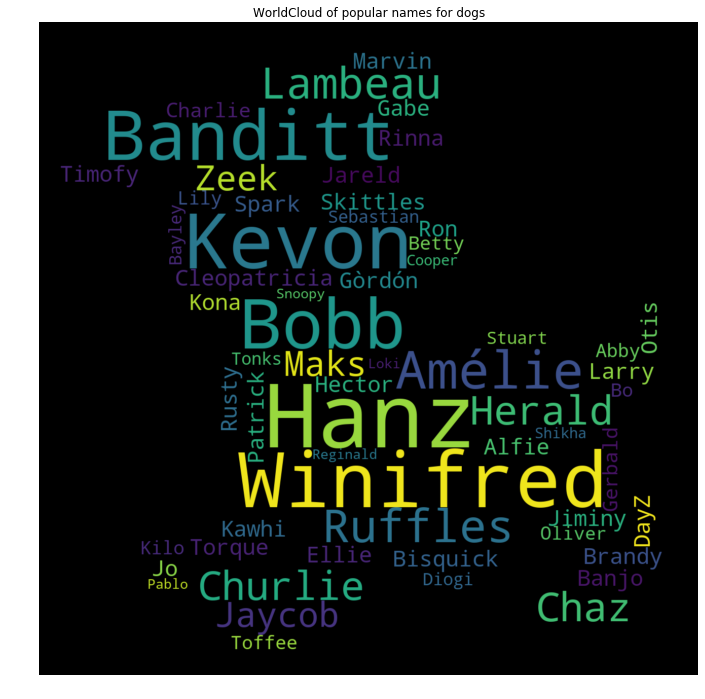

In [80]:
#Lets see what names are mostly used for naming dogs
#creating a mask
mask = np.array(Image.open('dd3.jpg'))
#text for word cloud
text = str(master.name)
#creating stopwords
stopwords = set(STOPWORDS)
stopwords.update(['Name','object','dtype', 'Length'])
#generating wordcloud
wordcloud = WordCloud(mask = mask, stopwords=stopwords, max_words = 300, mode = 'RGBA').generate(text)
# Display the generated image
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WorldCloud of popular names for dogs')

plt.show()


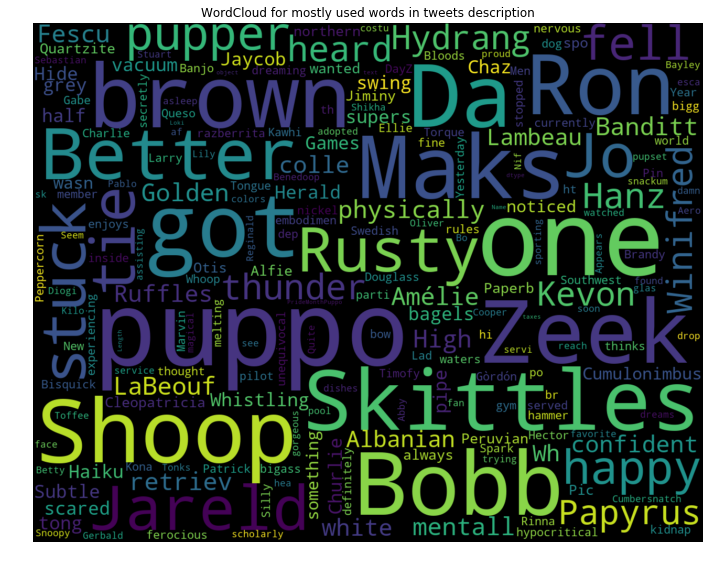

In [81]:
#Lets see what words are mostly used in the tweets as comments
#text for word cloud
text = str(master.text)
#creating a mask
mask = np.array(Image.open('red.jpg'))
#creating stopwords
stopwords = set(STOPWORDS)
stopwords.update(['https','hello','Say','Meet','likes'])

#generating wordcloud
wordcloud = WordCloud(mask = mask, stopwords=stopwords, max_words = 300, mode = 'RGBA').generate(text)
# Display the generated image
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for mostly used words in tweets description')
plt.savefig('word2.png')
plt.show()

> Lets see how many tweets do we have over the period of time

In [82]:
#lets get the subset of the data for number of tweet
tweet_count = master.groupby('year').month.value_counts()
#save the file to csv and recall call the data to set the index and header properly. We need to do this because 
# we are using groupby and count. This doesn't set the index and header properly
tweet_count = tweet_count.to_csv('tweet_count.csv', index = True)
# groupby and count also doesn't give proper header so keep header as none
tweet_count = pd.read_csv('tweet_count.csv', header = None)
# set the header with naming columns
new_labels = ['year','month','tweet_count']
tweet_count.columns = new_labels
#view data
tweet_count.head()

,year,month,tweet_count
0,2015,12,227
1,2015,11,161
2,2016,1,113
3,2016,3,92
4,2016,2,79


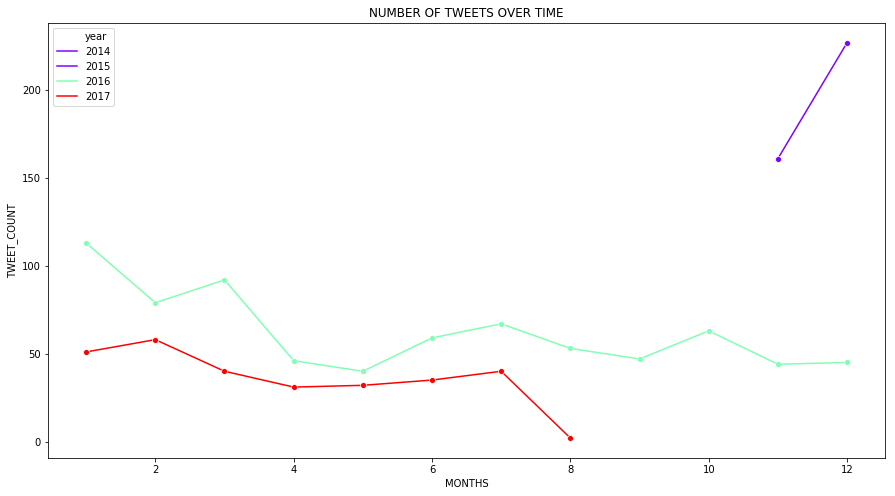

In [83]:
#Lets see the trend of tweets over the years
plt.figure(figsize = (15,8))
ax = sns.lineplot(x = tweet_count.month, y = tweet_count.tweet_count , hue = 'year', marker = 'o', data = tweet_count, palette = 'rainbow');
plt.ylabel('TWEET_COUNT')
plt.xlabel('MONTHS')
plt.title('NUMBER OF TWEETS OVER TIME');


> Lets see how many favorite_count we have over the years

In [84]:
#lets get the subset of the data for number of favorites
favorite_count = master.groupby(['year','month']).favorite_count.sum()
#save the file to csv and recall call the data to set the index and header properly. We need to do this because 
# we are using groupby and count. This doesn't set the index and header properly
favorite_count = favorite_count.to_csv('favorite_count.csv', index = True)
# groupby and count also doesn't give proper header so keep header as none
favorite_count = pd.read_csv('favorite_count.csv', header = None)
# set the header with naming columns
new_labels = ['year','month','favorite_count']
favorite_count.columns = new_labels
#view data
favorite_count.head()

,year,month,favorite_count
0,2015,11,225516.0
1,2015,12,762486.0
2,2016,1,427272.0
3,2016,2,329369.0
4,2016,3,365575.0


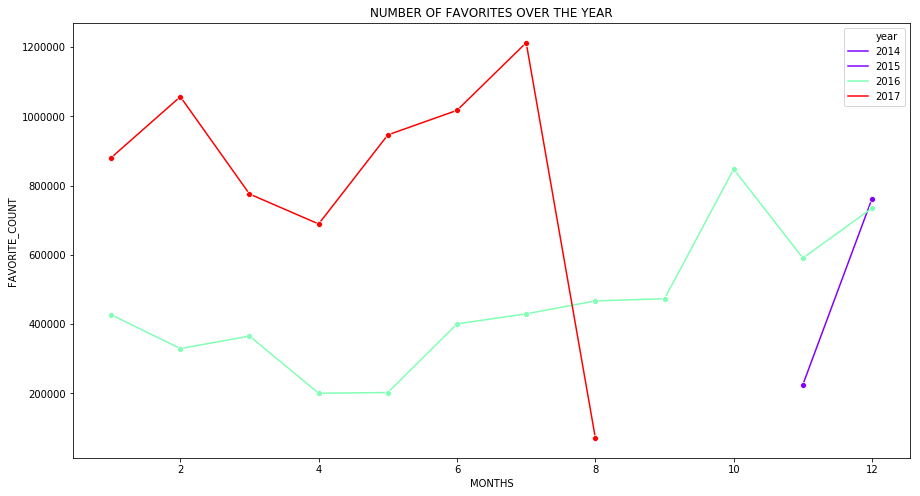

In [85]:
#Lets see the trend of favorites over years
plt.figure(figsize = (15,8))

ax = sns.lineplot(x = favorite_count.month, y = favorite_count.favorite_count , hue = 'year', marker = 'o', data = favorite_count, palette = 'rainbow');
plt.ylabel('FAVORITE_COUNT')
plt.xlabel('MONTHS')
plt.title('NUMBER OF FAVORITES OVER THE YEAR');


In [86]:
#lets get the subset of the data for number of retweet
retweet_count = master.groupby(['year','month']).retweet_count.sum()
#save the file to csv and recall call the data to set the index and header properly. We need to do this because 
# we are using groupby and count. This doesn't set the index and header properly
retweet_count = retweet_count.to_csv('retweet_count.csv', index = True)
# groupby and count also doesn't give proper header so keep header as none
retweet_count = pd.read_csv('retweet_count.csv', header = None)
# set the header with naming columns
new_labels = ['year','month','retweet_count']
retweet_count.columns = new_labels
#view data
retweet_count.head()

,year,month,retweet_count
0,2015,11,90863.0
1,2015,12,318853.0
2,2016,1,156004.0
3,2016,2,118485.0
4,2016,3,120897.0


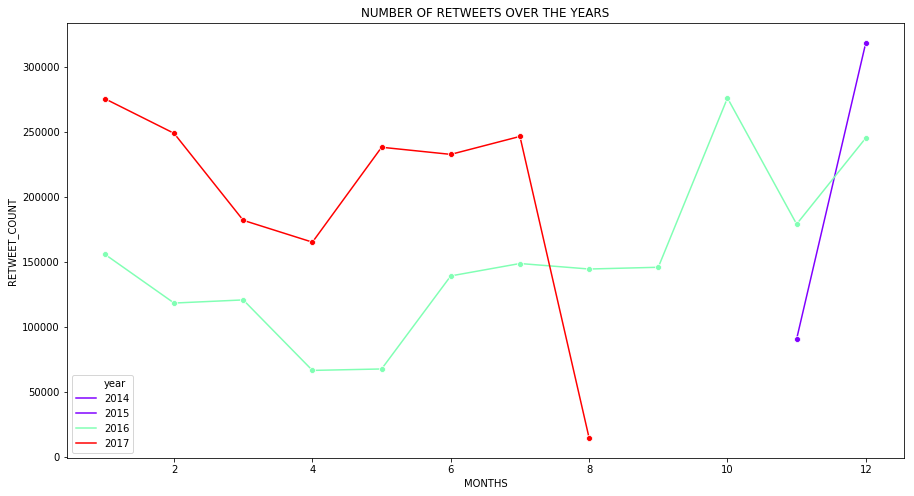

In [87]:
#Lets see the trend of retweets over the years
plt.figure(figsize = (15,8))

ax = sns.lineplot(x = retweet_count.month, y = retweet_count.retweet_count , hue = 'year', marker = 'o', data = retweet_count, palette = 'rainbow');
plt.ylabel('RETWEET_COUNT')
plt.xlabel('MONTHS')
plt.title('NUMBER OF RETWEETS OVER THE YEARS');


> As we have seen the trends of tweets, favorites and retweets over time lets see if there is a corelation between them

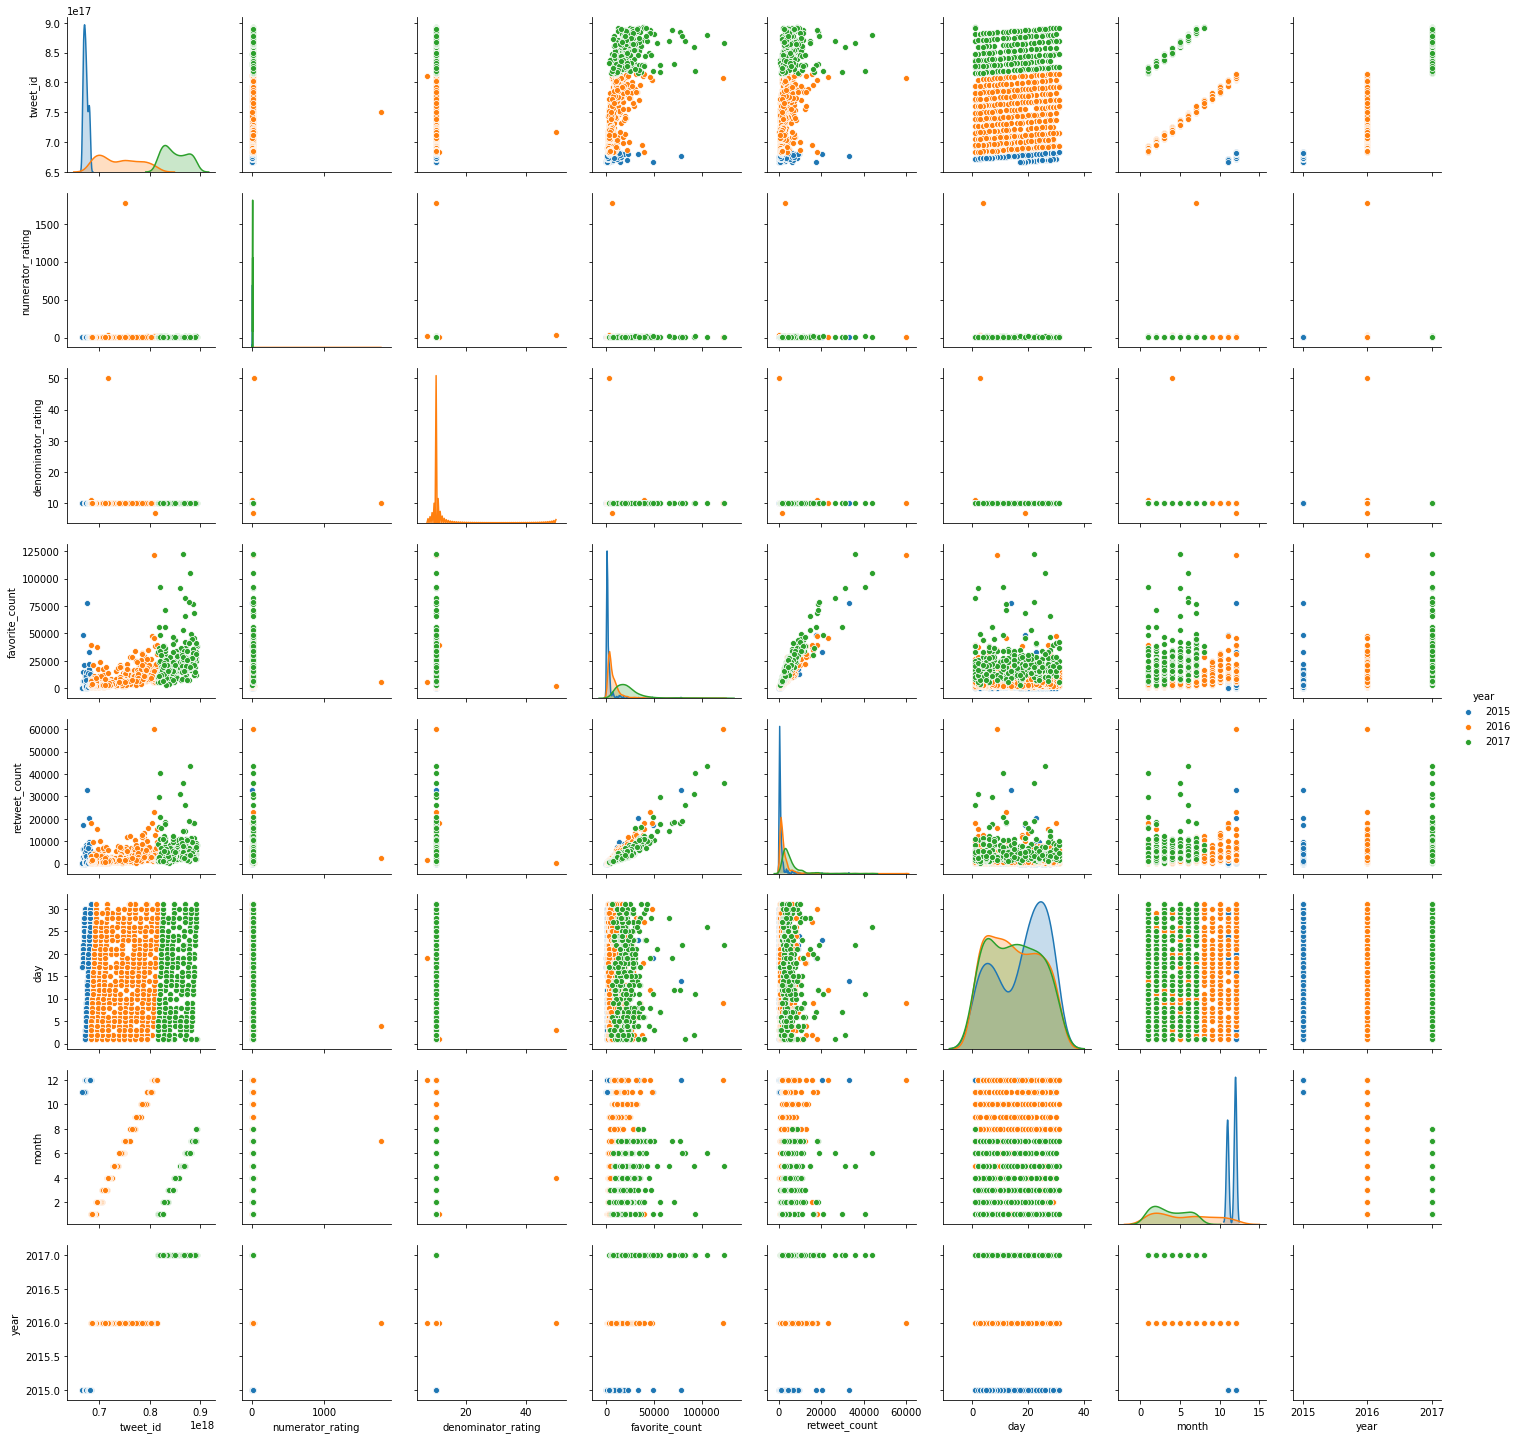

In [88]:
#lets check the pairplot for dataset based on year

sns.pairplot(master, hue="year");


*considereing the pairplot lets go ahead and see the scatterplot for favorite_count and retweet_count to see what is the corelation between them*

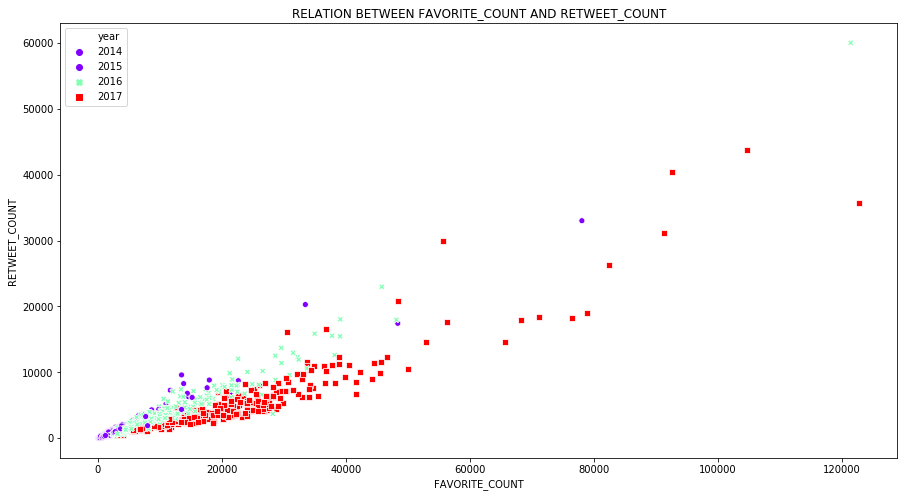

In [89]:
#lets get a scatterplot 
plt.figure(figsize = (15,8))
ax = sns.scatterplot(x= master.favorite_count, y=master.retweet_count, hue = 'year', style = 'year', data= master, palette = 'rainbow')
plt.xlabel('FAVORITE_COUNT')
plt.ylabel('RETWEET_COUNT')
plt.title('RELATION BETWEEN FAVORITE_COUNT AND RETWEET_COUNT');


> we have already seen the popular dog names and polular words in tweets. Lets now go ahead and see what the popular dog breeds and popular dog stages

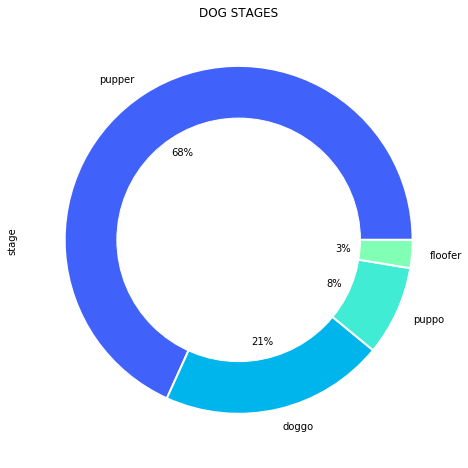

In [90]:
#Lets see what are the popular dog stages according to our data
plt.figure(figsize=(8,8))
master[master.stage != 'None'].stage.value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",7),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title('DOG STAGES')
plt.show()

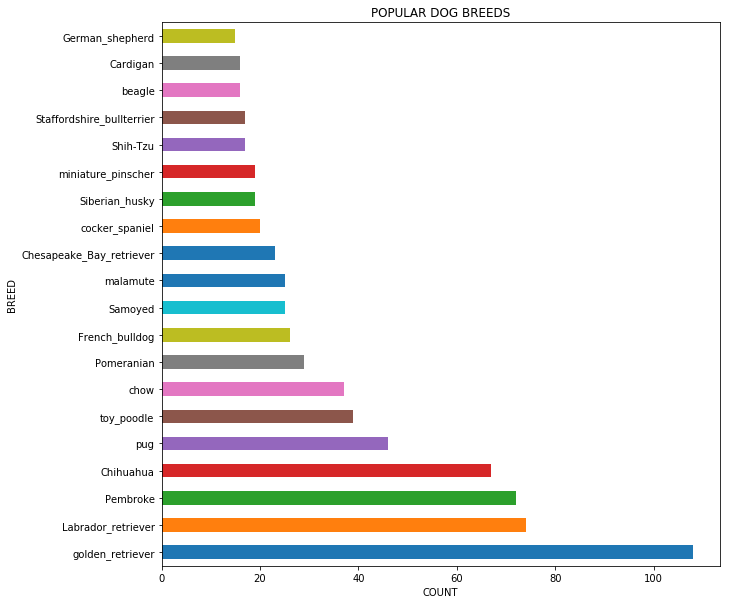

In [91]:
#Lets get the popular dog breed according to our data
plt.figure(figsize=(10,10))
master['breed'].value_counts()[:20].plot(kind = 'barh')
plt.xlabel('COUNT')
plt.ylabel('BREED')
plt.title('POPULAR DOG BREEDS');


<a id='conclusions'></a>
## Conclusions and Limitations

In this report we gather data from three different data sources like a CSV file which was already given, the second data source is a URL and we get the data from URL using response library and the third dataset is on a twitter page which we get through API and tweepy. This data purely provides us information about dogs and they are rated with a humorous comment. WeRateDogs has international media coverage and has 7 million followers.

We gather the data from all the sources and look for quality and tidiness issues the data has. After we write down the issues we go ahead and try to fix the quality and tidiness issues. After cleaning the data we analyzed and provided visualizations. The insights on the data are provided in act_report.


**Limitations:**

The insights drawn from the analysis and visualization is purely based on the given data. The major limitation with the data is having duplicate records and multiple missing values. Here in this report, the cleaned data had 1425 tweet values whereas the actual twitter page shows us about 9000 tweets. Also, the rating is not always just a rating sometimes the rating is given based on years or acts or movies and multiple other reasons. 

## Sources

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.findall.html

https://regexone.com/

https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html

https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pythons-pandas

https://docs.python.org/3.4/library/json.html#json.dump

https://wiki.python.org/moin/HandlingExceptions

https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
